<a href="https://colab.research.google.com/github/zahrahmadani97/T3_NISFALAH-ZAHRAH-RAHMADANI_230907501038/blob/main/T3_NISFALAH_ZAHRAH_RAHMADANI_230907501038.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
df=pd.read_csv("/content/Skincare.csv")
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1964628169018990971,Mon Sep 08 23:55:29 +0000 2025,0,@lucykiess malah beli skincare,1965202360478892181,NaN,lucykiess,in,NaN,0,1,0,https://x.com/undefined/status/196520236047889...,1824660921425309696,NaN
1,1965200126735258020,Mon Sep 08 23:46:36 +0000 2025,0,guys aku kan mau benerin skin barier-ku kira2 ...,1965200126735258020,NaN,NaN,in,NaN,0,5,0,https://x.com/undefined/status/196520012673525...,1281724698313633792,NaN
2,1965044145048928338,Mon Sep 08 23:45:57 +0000 2025,6,@kymtaa @somexthread Kak udah ga sanggup beli ...,1965199961127354422,NaN,kymtaa,in,NaN,0,0,0,https://x.com/undefined/status/196519996112735...,122265403,NaN
3,1965199871851544795,Mon Sep 08 23:45:35 +0000 2025,0,Storage nya muat banyak skincare &amp; bikin r...,1965199871851544795,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/196519987185154...,1466569433598418948,NaN
4,1965199859415158904,Mon Sep 08 23:45:32 +0000 2025,66,{mu} guys buat masalah darkspot kusam PIH rang...,1965199859415158904,https://pbs.twimg.com/media/G0XK24fXIAA_xmN.jpg,NaN,in,NaN,0,10,2,https://x.com/undefined/status/196519985941515...,866802272432300032,NaN


In [9]:
df=df[['full_text','created_at']]
df

,full_text,created_at
0,@lucykiess malah beli skincare,Mon Sep 08 23:55:29 +0000 2025
1,guys aku kan mau benerin skin barier-ku kira2 ...,Mon Sep 08 23:46:36 +0000 2025
2,@kymtaa @somexthread Kak udah ga sanggup beli ...,Mon Sep 08 23:45:57 +0000 2025
3,Storage nya muat banyak skincare &amp; bikin r...,Mon Sep 08 23:45:35 +0000 2025
4,{mu} guys buat masalah darkspot kusam PIH rang...,Mon Sep 08 23:45:32 +0000 2025
...,...,...
1498,@tanyarlfes banyak lah. ya kerja ya kursus ya ...,Fri Sep 05 17:09:42 +0000 2025
1499,@akusukanct @kebunkubuku @tanyakanrl dulu sebe...,Fri Sep 05 17:08:45 +0000 2025
1500,@natathexoxo Emang kaya kulkas mini sih mamaku...,Fri Sep 05 16:58:48 +0000 2025
1501,@NyanNyaw @tanyakanrl Berarti setiap bekas luk...,Fri Sep 05 16:51:26 +0000 2025


1. CLEANING DATA


In [10]:
df.shape

(1503, 2)

In [11]:
df=df.drop_duplicates(subset=['full_text'])

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df=df.dropna()

In [14]:
df.isnull().sum()

,0
full_text,0
created_at,0


In [15]:
df.shape

(1487, 2)

In [16]:
def clean_twitter_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?://\S+', '', text)

    text = re.sub(r'[^A-Za-z0-9 ]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

df['full_text'] = df['full_text'].apply(clean_twitter_text)

In [17]:
df['full_text']=df['full_text'].str.lower()

In [18]:
df

,full_text,created_at
0,malah beli skincare,Mon Sep 08 23:55:29 +0000 2025
1,guys aku kan mau benerin skin barierku kira2 b...,Mon Sep 08 23:46:36 +0000 2025
2,kak udah ga sanggup beli skincare sendiri yaa ...,Mon Sep 08 23:45:57 +0000 2025
3,storage nya muat banyak skincare amp bikin rap...,Mon Sep 08 23:45:35 +0000 2025
4,mu guys buat masalah darkspot kusam pih rangka...,Mon Sep 08 23:45:32 +0000 2025
...,...,...
1498,banyak lah ya kerja ya kursus ya hangout ya sk...,Fri Sep 05 17:09:42 +0000 2025
1499,dulu sebelum konsul dokter aku dah pernah pake...,Fri Sep 05 17:08:45 +0000 2025
1500,emang kaya kulkas mini sih mamaku bilang kaya ...,Fri Sep 05 16:58:48 +0000 2025
1501,berarti setiap bekas luka selalu gitu ya kak s...,Fri Sep 05 16:51:26 +0000 2025


2. NORMALISASI

In [19]:
# Normalisasi
norm = {
    " yg ": " yang ",
    " tp ": "tetapi",
    " sdh ": "sudah",
    " nggak ": " tidak ",
    " gak ": " tidak ",
    " banget ": " sangat ",
    " jg ": " juga ",
    " tuk ": "untuk",
    " msh ": "masih",
    " fav ": " favorit ",
    " trus ": " terus ",
    " dah ": " sudah ",
    " rep ": " repurchase ",
    " skrg ": " sekarang ",
    " jd ": " jadi ",
    " ga ": " tidak"
}

def normalisasi(str_text):
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text

df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df

,full_text,created_at
0,malah beli skincare,Mon Sep 08 23:55:29 +0000 2025
1,guys aku kan mau benerin skin barierku kira2 b...,Mon Sep 08 23:46:36 +0000 2025
2,kak udah tidaksanggup beli skincare sendiri ya...,Mon Sep 08 23:45:57 +0000 2025
3,storage nya muat banyak skincare amp bikin rap...,Mon Sep 08 23:45:35 +0000 2025
4,mu guys buat masalah darkspot kusam pih rangka...,Mon Sep 08 23:45:32 +0000 2025
...,...,...
1498,banyak lah ya kerja ya kursus ya hangout ya sk...,Fri Sep 05 17:09:42 +0000 2025
1499,dulu sebelum konsul dokter aku sudah pernah pa...,Fri Sep 05 17:08:45 +0000 2025
1500,emang kaya kulkas mini sih mamaku bilang kaya ...,Fri Sep 05 16:58:48 +0000 2025
1501,berarti setiap bekas luka selalu gitu ya kak s...,Fri Sep 05 16:51:26 +0000 2025


In [20]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 8.3 MB/s eta 0:00:00


In [21]:
# Stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

more_stop_words = ["tidak"]

# Dapatkan stopword dan tambahkan custom stopword
stop_word_factory = StopWordRemoverFactory()
stop_words = stop_word_factory.get_stop_words()
stop_words.extend(more_stop_words)

# Buat stopword remover dengan daftar stopword terbaru
stopword_remover = stop_word_factory.create_stop_word_remover()

def stopword(str_text):
    str_text = stopword_remover.remove(str_text)
    return str_text

# Aplikasikan fungsi stopword ke kolom 'full_text'
df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df.head()

,full_text,created_at
0,malah beli skincare,Mon Sep 08 23:55:29 +0000 2025
1,guys aku kan mau benerin skin barierku kira2 s...,Mon Sep 08 23:46:36 +0000 2025
2,kak udah tidaksanggup beli skincare sendiri ya...,Mon Sep 08 23:45:57 +0000 2025
3,storage nya muat banyak skincare amp bikin rap...,Mon Sep 08 23:45:35 +0000 2025
4,mu guys buat masalah darkspot kusam pih rangka...,Mon Sep 08 23:45:32 +0000 2025


In [22]:
tokenized=df['full_text'].apply(lambda x:x.split())
tokenized

,full_text
0,"[malah, beli, skincare]"
1,"[guys, aku, kan, mau, benerin, skin, barierku,..."
2,"[kak, udah, tidaksanggup, beli, skincare, send..."
3,"[storage, nya, muat, banyak, skincare, amp, bi..."
4,"[mu, guys, buat, masalah, darkspot, kusam, pih..."
...,...
1498,"[banyak, lah, kerja, kursus, hangout, skincare..."
1499,"[dulu, konsul, dokter, aku, pernah, pake, sale..."
1500,"[emang, kaya, kulkas, mini, sih, mamaku, bilan..."
1501,"[berarti, bekas, luka, selalu, gitu, kak, soal..."


In [23]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []

    for w in text_cleaning:
        dt = stemmer.stem(w)
        do.append(dt)

    d_clean = ' '
    d_clean = " ".join(do)
    print(d_clean)

    return d_clean
tokenized= tokenized.apply(stemming)
tokenized.to_csv("/content/hasilPreprocessingSkincare.csv", index=False)



malah beli skincare
guys aku kan mau benerin skin barier kira2 saranin aku skincare apa harus aku pake kayak moots serum retinol gitu bingung mulai mana
kak udah tidaksanggup beli skincare sendiri yaa makanya jadi buzzer alhamdulillah caiirr caiirr
storage nya muat banyak skincare amp bikin rapih jugaa
mu guys buat masalah darkspot kusam pih rangkai skincare mantul tidakatau saran yang punya masalah sama makasii
yg nyari skincare anti aging rapat siniii
repurchase cha beberapa mau habis skincare amp refill wardah cushion
daviena skincare milik melvina husyanti pernah kontroversi sejak 2023 tuding pakai fake buyer amp money laundering video viral 2024 ribut dr richard lee soal kandung hydroquinone amp overclaim body lotionhb dosting owner tolak amp klarifikasi
daviena skincare pernah hujat gara gara apa coba kronologi ribut ribut orang apa
new product make up skincare worth it buat beli 99 1 cushion baru instaperfect
wtb skincaremakeup dongg buat 99
bb plis kenapa aku pake micellar wate

3. TRANSLATE


In [24]:
# Langkah 1: Instalasi library yang dibutuhkan
# Ini adalah library standar industri untuk tugas seperti ini
!pip install transformers[sentencepiece] torch pandas
!pip install sacremoses

# Langkah 2: Import library yang diperlukan
import pandas as pd
from transformers import MarianMTModel, MarianTokenizer
import torch

# --- PENGATURAN ---
input_file = "hasilPreprocessingSkincare.csv"
output_file = "TerjemahanSkincareTranslate.csv"
kolom_sumber = "full_text" # Kolom yang berisi teks Indonesia
kolom_target = "tweet_english" # Nama kolom untuk hasil terjemahan
batch_size = 16 # Proses 16 baris sekaligus untuk kecepatan
# ------------------

try:
    # Membaca file CSV Anda
    data = pd.read_csv(input_file)
    print(f"File '{input_file}' berhasil dibaca. Jumlah baris: {len(data)}.")

    # Mengambil semua teks dari kolom sumber
    texts_to_translate = data[kolom_sumber].astype(str).tolist()

    # Mempersiapkan model (hanya perlu dilakukan sekali)
    print("\nMempersiapkan model terjemahan (mungkin perlu beberapa saat)...")
    model_name = 'Helsinki-NLP/opus-mt-id-en'
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    print(f"Model siap dan berjalan di: {device}")

    # Proses terjemahan secara efisien dalam batch
    print("\nMemulai proses terjemahan (ini akan jauh lebih cepat)...")
    all_translations = []
    for i in range(0, len(texts_to_translate), batch_size):
        batch = texts_to_translate[i:i + batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)
        translated_tokens = model.generate(**encoded)
        translations = tokenizer.batch_decode(translated_tokens, skip_special_tokens=True)
        all_translations.extend(translations)

    # Menambahkan hasil terjemahan sebagai kolom baru
    data[kolom_target] = all_translations

    # Menyimpan hasil akhir ke file CSV baru
    data.to_csv(output_file, index=False)

    print(f"\n✅ Proses Selesai! Hasil disimpan di '{output_file}'")
    print("Berikut 5 baris pertama dari hasil akhir:")
    print(data.head())

except FileNotFoundError:
    print(f"ERROR: File '{input_file}' tidak ditemukan.")
except Exception as e:
    print(f"Terjadi error: {e}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 15.0 MB/s eta 0:00:00
File 'hasilPreprocessingSkincare.csv' berhasil dibaca. Jumlah baris: 1487.

Mempersiapkan model terjemahan (mungkin perlu beberapa saat)...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/291M [00:00<?, ?B/s]

Model siap dan berjalan di: cuda

Memulai proses terjemahan (ini akan jauh lebih cepat)...

✅ Proses Selesai! Hasil disimpan di 'TerjemahanSkincareTranslate.csv'
Berikut 5 baris pertama dari hasil akhir:
                                           full_text  \
0                                malah beli skincare   
1  guys aku kan mau benerin skin barier kira2 sar...   
2  kak udah tidaksanggup beli skincare sendiri ya...   
3  storage nya muat banyak skincare amp bikin rap...   
4  mu guys buat masalah darkspot kusam pih rangka...   

                                       tweet_english  
0                               Even buy a skincare.  
1  Guys, I'm going to fix the barier. I'm going t...  
2  fontcolor=" # FFFF00"youcannot affordto buyyou...  
3  His storage fits a lot of skincare amp making ...  
4  You guys make trouble darkspots pih frame skin...  


CLEANING

In [25]:
# Import library yang dibutuhkan (hanya pandas dan re)
import pandas as pd
import re

# --- PENGATURAN ---
# 1. Nama file input Anda yang sudah diterjemahkan (tapi masih kotor)
input_file = "TerjemahanSkincareTranslate.csv"

# 2. Nama untuk file output yang akan bersih
output_file = "TerjemahanSkincae.csv"

# 3. Nama kolom yang ingin Anda bersihkan
kolom_untuk_dibersihkan = "tweet_english"
# ------------------

# --- Fungsi Pembersih Kode Warna ---
def bersihkan_kode_warna(teks):
    # Cek apakah inputnya adalah string
    if isinstance(teks, str):
        # Hapus pola fontcolor="..." beserta isinya
        teks = re.sub(r'fontcolor="[^"]*"', '', teks, flags=re.IGNORECASE)
        # Hapus sisa kata 'fontcolor' atau kode warna seperti #FFFF00
        teks = re.sub(r'fontcolor|#\s*[A-Fa-f0-9]{6}', '', teks, flags=re.IGNORECASE)
        # Hapus semua tanda kutip ganda
        teks = teks.replace('"', '')
        # Ganti spasi berlebih dengan satu spasi
        teks = re.sub(r'\s+', ' ', teks).strip()
        return teks
    # Kembalikan string kosong jika data bukan teks (misalnya, data kosong/NaN)
    return ""

# --- PROSES UTAMA ---
try:
    # 1. Baca file CSV Anda
    data = pd.read_csv(input_file)
    print(f"File '{input_file}' berhasil dibaca. Memproses {len(data)} baris.")

    # 2. Pastikan kolom yang akan dibersihkan ada di dalam file
    if kolom_untuk_dibersihkan not in data.columns:
        raise ValueError(f"Kolom '{kolom_untuk_dibersihkan}' tidak ditemukan di file. Mohon periksa nama kolom di Pengaturan.")

    # 3. Terapkan fungsi pembersihan pada kolom yang ditentukan
    print(f"Membersihkan kolom '{kolom_untuk_dibersihkan}' dari kode warna...")
    data[kolom_untuk_dibersihkan] = data[kolom_untuk_dibersihkan].apply(bersihkan_kode_warna)
    print("Pembersihan selesai.")

    # 4. Simpan hasilnya ke file CSV baru
    data.to_csv(output_file, index=False)

    print(f"\n✅ Proses Selesai! File yang sudah bersih disimpan di '{output_file}'")
    print("\nBerikut 5 baris pertama dari hasil yang sudah dibersihkan:")
    print(data.head())

except FileNotFoundError:
    print(f"ERROR: File '{input_file}' tidak ditemukan. Pastikan nama file sudah benar.")
except Exception as e:
    print(f"Terjadi error: {e}")

File 'TerjemahanSkincareTranslate.csv' berhasil dibaca. Memproses 1487 baris.
Membersihkan kolom 'tweet_english' dari kode warna...
Pembersihan selesai.

✅ Proses Selesai! File yang sudah bersih disimpan di 'TerjemahanSkincae.csv'

Berikut 5 baris pertama dari hasil yang sudah dibersihkan:
                                           full_text  \
0                                malah beli skincare   
1  guys aku kan mau benerin skin barier kira2 sar...   
2  kak udah tidaksanggup beli skincare sendiri ya...   
3  storage nya muat banyak skincare amp bikin rap...   
4  mu guys buat masalah darkspot kusam pih rangka...   

                                       tweet_english  
0                               Even buy a skincare.  
1  Guys, I'm going to fix the barier. I'm going t...  
2  youcannot affordto buyyourownskincare yes that...  
3  His storage fits a lot of skincare amp making ...  
4  You guys make trouble darkspots pih frame skin...  


4. LABELLING

In [27]:
data = pd.read_csv("/content/TerjemahanSkincae.csv", index_col=0)

# Reset indeks agar menjadi kolom biasa
data_dengan_nomor = data.reset_index()
data_dengan_nomor

,full_text,tweet_english
0,malah beli skincare,Even buy a skincare.
1,guys aku kan mau benerin skin barier kira2 sar...,"Guys, I'm going to fix the barier. I'm going t..."
2,kak udah tidaksanggup beli skincare sendiri ya...,youcannot affordto buyyourownskincare yes that...
3,storage nya muat banyak skincare amp bikin rap...,His storage fits a lot of skincare amp making ...
4,mu guys buat masalah darkspot kusam pih rangka...,You guys make trouble darkspots pih frame skin...
...,...,...
1482,banyak lah kerja kursus hangout skincare an ba...,Many work classes hangout skittare and read bo...
1483,dulu konsul dokter aku pernah pake salep china...,I used to wear Chinese ointment. He didn't say...
1484,emang kaya kulkas mini sih mama bilang kaya ku...,"It's like a mini-fridge, but you said it's lik..."
1485,arti bekas luka selalu gitu kak soal klo aku c...,"That's what scars always mean. You know, if I'..."


In [28]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [29]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 611
Netral = 672
Negatif = 204

Total Data : 1487


In [31]:
data['klasifikasi'] = status
data

,tweet_english,klasifikasi
full_text,,
malah beli skincare,Even buy a skincare.,Netral
guys aku kan mau benerin skin barier kira2 saranin aku skincare apa harus aku pake kayak moots serum retinol gitu bingung mulai mana,"Guys, I'm going to fix the barier. I'm going t...",Netral
kak udah tidaksanggup beli skincare sendiri yaa makanya jadi buzzer alhamdulillah caiirr caiirr,youcannot affordto buyyourownskincare yes that...,Netral
storage nya muat banyak skincare amp bikin rapih jugaa,His storage fits a lot of skincare amp making ...,Netral
mu guys buat masalah darkspot kusam pih rangkai skincare mantul tidakatau saran yang punya masalah sama makasii,You guys make trouble darkspots pih frame skin...,Netral
...,...,...
banyak lah kerja kursus hangout skincare an baca buku joging nafas sampe lupa klo khidupan bab cinta cinta,Many work classes hangout skittare and read bo...,Positif
dulu konsul dokter aku pernah pake salep china sriti dia ngga ngaruh oiya aku derita eksim sama darah manis kamu konsul aja kak sama dokter cocok2an soal kaya skincare,I used to wear Chinese ointment. He didn't say...,Positif
emang kaya kulkas mini sih mama bilang kaya kulkas skincare,"It's like a mini-fridge, but you said it's lik...",Netral


5. VISUALISASI

Data asli untuk WordCloud berhasil dimuat.


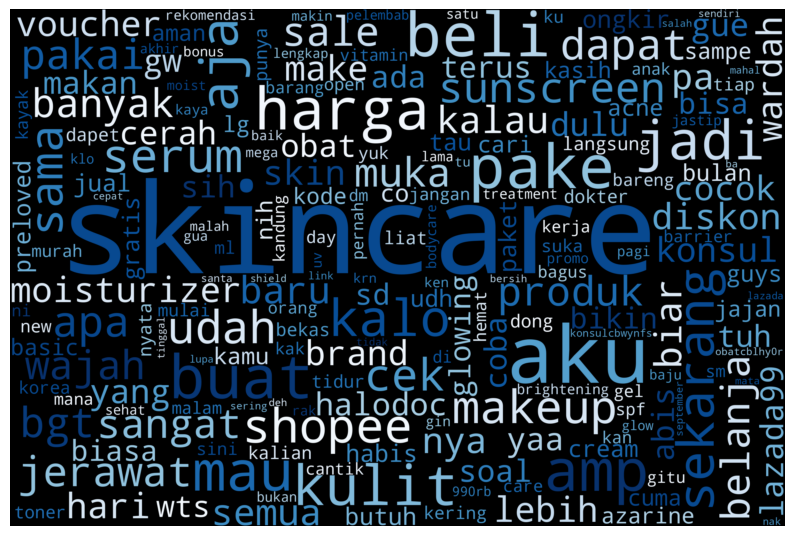

In [32]:
# Langkah 1: Instalasi library jika belum ada
!pip install wordcloud

# Langkah 2: Import library
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# LANGKAH PENTING:
# Selalu muat ulang file ASLI untuk memastikan kolom 'full_text' ada.
try:
    data_for_wc = pd.read_csv("/content/hasilPreprocessingSkincare.csv")
    print("Data asli untuk WordCloud berhasil dimuat.")

    # Gabungkan semua teks dari kolom 'full_text' menjadi satu string
    all_words = ' '.join([str(tweets) for tweets in data_for_wc['full_text']])

    # Buat dan tampilkan WordCloud
    wordcloud = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color='black',
        colormap='Blues_r',
        collocations=False,
        stopwords=STOPWORDS
    ).generate(all_words)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

except FileNotFoundError:
    print("ERROR: File '/content/hasilPreprocessingSkincare.csv' tidak ditemukan. Pastikan file sudah di-upload.")

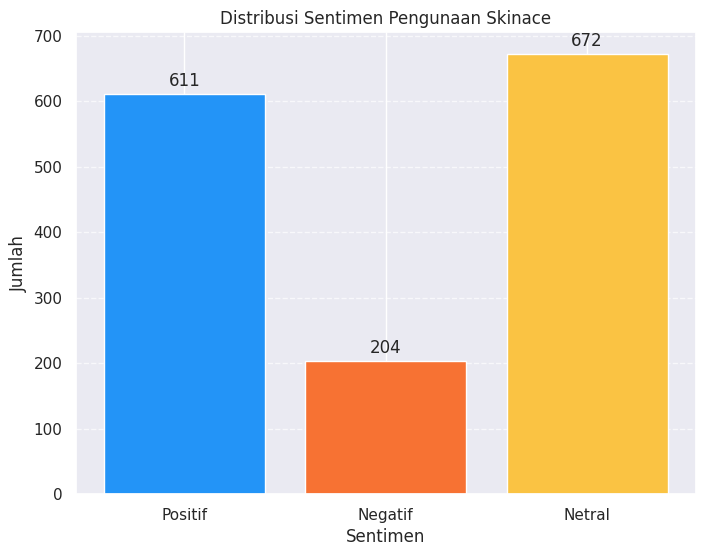

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f77233', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Pengunaan Skinace")

6. KLASIFIKASI SENTIMEN

In [34]:
data

,tweet_english,klasifikasi
full_text,,
malah beli skincare,Even buy a skincare.,Netral
guys aku kan mau benerin skin barier kira2 saranin aku skincare apa harus aku pake kayak moots serum retinol gitu bingung mulai mana,"Guys, I'm going to fix the barier. I'm going t...",Netral
kak udah tidaksanggup beli skincare sendiri yaa makanya jadi buzzer alhamdulillah caiirr caiirr,youcannot affordto buyyourownskincare yes that...,Netral
storage nya muat banyak skincare amp bikin rapih jugaa,His storage fits a lot of skincare amp making ...,Netral
mu guys buat masalah darkspot kusam pih rangkai skincare mantul tidakatau saran yang punya masalah sama makasii,You guys make trouble darkspots pih frame skin...,Netral
...,...,...
banyak lah kerja kursus hangout skincare an baca buku joging nafas sampe lupa klo khidupan bab cinta cinta,Many work classes hangout skittare and read bo...,Positif
dulu konsul dokter aku pernah pake salep china sriti dia ngga ngaruh oiya aku derita eksim sama darah manis kamu konsul aja kak sama dokter cocok2an soal kaya skincare,I used to wear Chinese ointment. He didn't say...,Positif
emang kaya kulkas mini sih mama bilang kaya kulkas skincare,"It's like a mini-fridge, but you said it's lik...",Netral


In [35]:
dataset = data.drop(['tweet_english'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [36]:
import random

# Re-create the dataset_final in the format (text, label) from the 'data' DataFrame
# which already contains 'tweet_english' and 'klasifikasi' columns.
dataset = list(zip(data['tweet_english'], data['klasifikasi']))

set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
    if n[1] == 'Positif':
        set_positif.append(n)
    elif n[1] == 'Negatif':
        set_negatif.append(n)
    else:
        set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
    train_set.append(n)

In [37]:
from textblob.classifiers import NaiveBayesClassifier
import nltk

nltk.download('punkt_tab')

cl = NaiveBayesClassifier(train_set)
print("Akurasi Test: ", cl.accuracy(dataset))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Akurasi Test:  0.7619367854741089


In [38]:
# Labeling
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet, classifier=cl)

    if analysis.classify() == 'Positif':
        total_positif += 1
    elif analysis.classify() == 'Netral':
        total_netral += 1
    else:
        total_negatif += 1

    status.append(analysis.classify())
    total += 1

print(f'\nHasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')


Hasil Analisis Data:
Positif = 538
Netral = 890
Negatif = 59

Total Data : 1487


In [39]:
status = pd.DataFrame({"Klasifikasi Bayes": status}, index=data.index)
data['klasifikasi_bayes'] = status

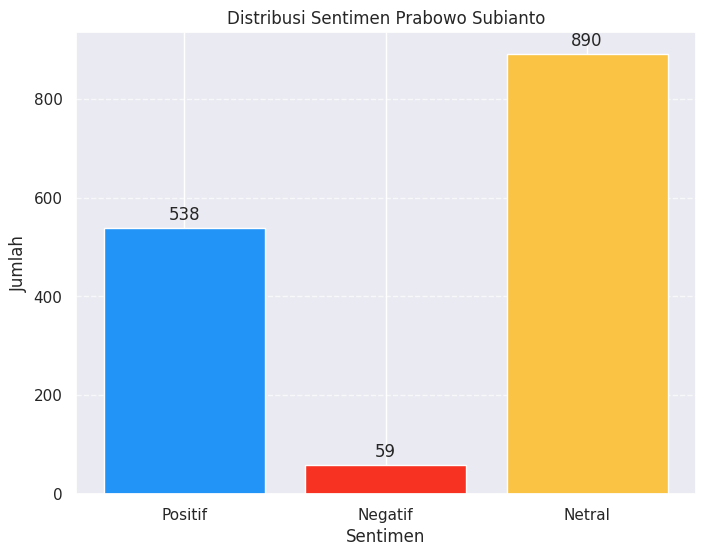

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set tema seaborn untuk tampilan yang lebih profesional
sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f73223', '#fac343'])

    # Menambahkan keterangan persentase
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Menambahkan grid
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Menambahkan label sumbu dan judul
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Prabowo Subianto")

In [41]:
data

,tweet_english,klasifikasi,klasifikasi_bayes
full_text,,,
malah beli skincare,Even buy a skincare.,Netral,Netral
guys aku kan mau benerin skin barier kira2 saranin aku skincare apa harus aku pake kayak moots serum retinol gitu bingung mulai mana,"Guys, I'm going to fix the barier. I'm going t...",Netral,Netral
kak udah tidaksanggup beli skincare sendiri yaa makanya jadi buzzer alhamdulillah caiirr caiirr,youcannot affordto buyyourownskincare yes that...,Netral,Netral
storage nya muat banyak skincare amp bikin rapih jugaa,His storage fits a lot of skincare amp making ...,Netral,Netral
mu guys buat masalah darkspot kusam pih rangkai skincare mantul tidakatau saran yang punya masalah sama makasii,You guys make trouble darkspots pih frame skin...,Netral,Positif
...,...,...,...
banyak lah kerja kursus hangout skincare an baca buku joging nafas sampe lupa klo khidupan bab cinta cinta,Many work classes hangout skittare and read bo...,Positif,Positif
dulu konsul dokter aku pernah pake salep china sriti dia ngga ngaruh oiya aku derita eksim sama darah manis kamu konsul aja kak sama dokter cocok2an soal kaya skincare,I used to wear Chinese ointment. He didn't say...,Positif,Positif
emang kaya kulkas mini sih mama bilang kaya kulkas skincare,"It's like a mini-fridge, but you said it's lik...",Netral,Netral


In [42]:
data_eval = [tuple(x) for x in data.to_records(index=False)]

for n in data_eval:
    # Check if the tuple has enough elements before accessing
    if len(n) >= 3: # We need at least 3 elements to access index 1 and 2
        # Compare the original classification (index 1) with the Bayes classification (index 2)
        if n[1] == n[2]:
            # Print relevant information - the translated text and the two classifications
            print(f"Text: {n[0]}\nOriginal Classifier: {n[1]}\nBayes Classifier: {n[2]}\n")
    else:
        print("Tuple does not have enough elements for comparison.")

Text: Even buy a skincare.
Original Classifier: Netral
Bayes Classifier: Netral

Text: Guys, I'm going to fix the barier. I'm going to suggest that I skincare. Do I have to use the moots of the retinol serum?
Original Classifier: Netral
Bayes Classifier: Netral

Text: youcannot affordto buyyourownskincare yes that'swhybuyeralhamdulillah cairr cairr
Original Classifier: Netral
Bayes Classifier: Netral

Text: His storage fits a lot of skincare amp making it neat, too.
Original Classifier: Netral
Bayes Classifier: Netral

Text: Looking for skincare anti aging meeting here.
Original Classifier: Netral
Bayes Classifier: Netral

Text: repurchase cha some are going to run out of skittare amps refil wardah cushion
Original Classifier: Netral
Bayes Classifier: Netral

Text: Davisen Skincare of Melvina husyanti has been in controversy since 2023 tuding using fake buyer amp money is launching viral video 2024 of richard lee's biological hydroquinone amp overclaim body lotionhb doting personallyer

In [43]:
import csv

# Nama file CSV output
output_csv_file = "evaluasi_klasifikasi.csv"

# Menulis data ke file CSV
with open(output_csv_file, 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)

    # Menulis header (opsional, tapi disarankan)
    csv_writer.writerow(['Text', 'Original Classifier', 'Bayes Classifier'])

    # Menulis data
    for row in data_eval:
        # Pastikan setiap baris memiliki jumlah elemen yang sesuai dengan header
        if len(row) >= 3:
            csv_writer.writerow(row)
        else:
            # Tangani kasus jika baris tidak memiliki cukup elemen
            print(f"Skipping row due to insufficient elements: {row}")


print(f"Data evaluasi berhasil diekspor ke '{output_csv_file}'")

Data evaluasi berhasil diekspor ke 'evaluasi_klasifikasi.csv'
